# </center>MODELS 

*Testing models then used in the "src" files*

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , f1_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMRegressor


### GET DATA 

In [3]:
# reading dataset using panda
data_path = os.path.dirname(os.getcwd())
data_df = pd.read_csv(os.path.join(data_path, "data\\data_income.csv"))
data_df = data_df.dropna()

In [4]:
data_df["income"].value_counts()


income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [5]:
# Define the features and target
X = data_df.drop(["income"], axis=1)
y = data_df["income"]

# Define the categorical columns to one-hot encode
categorical_cols = [
    "occupation",
    "education",
    "workclass",
    "marital-status",
    "relationship",
    "race",
    "native-country",
    "gender",
]
numeric_cols = [
    "age",
    "fnlwgt",
    "educational-num",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
]


In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# fix the format for y
y_train = y_train.replace({">50K": 1, "<=50K": 0})
y_test = y_test.replace({">50K": 1, "<=50K": 0})

## RANDOM FOREST

### OneHotEncoding

In [83]:
############## preprocessing & pipeline ##############

# Define preprocessing for categorical and numeric data
categorical_preprocessor = OneHotEncoder()
numeric_preprocessor = StandardScaler()

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_preprocessor, categorical_cols),
        ("num", numeric_preprocessor, numeric_cols),
    ],
    remainder="passthrough",  # You can use this to include any remaining columns
)

# Create a pipeline with preprocessing and the machine learning model
model = RandomForestClassifier(random_state=42)

pipeline = Pipeline([("preprocessor", preprocessor), ("model", model)])


In [84]:
######################## Train & Predict ########################

# Fit the pipeline (including preprocessing) to the training data
pipeline.fit(X_train, y_train)
# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Accuracy f1: {f1:.4f}")

Accuracy: 0.8587
Accuracy f1: 0.6806


### features importances

In [9]:
feature_importance = model.feature_importances_

# Combine the one-hot feature names with the numeric feature names
all_feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame(
    {"Feature": all_feature_names, "Importance": feature_importance}
)

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)


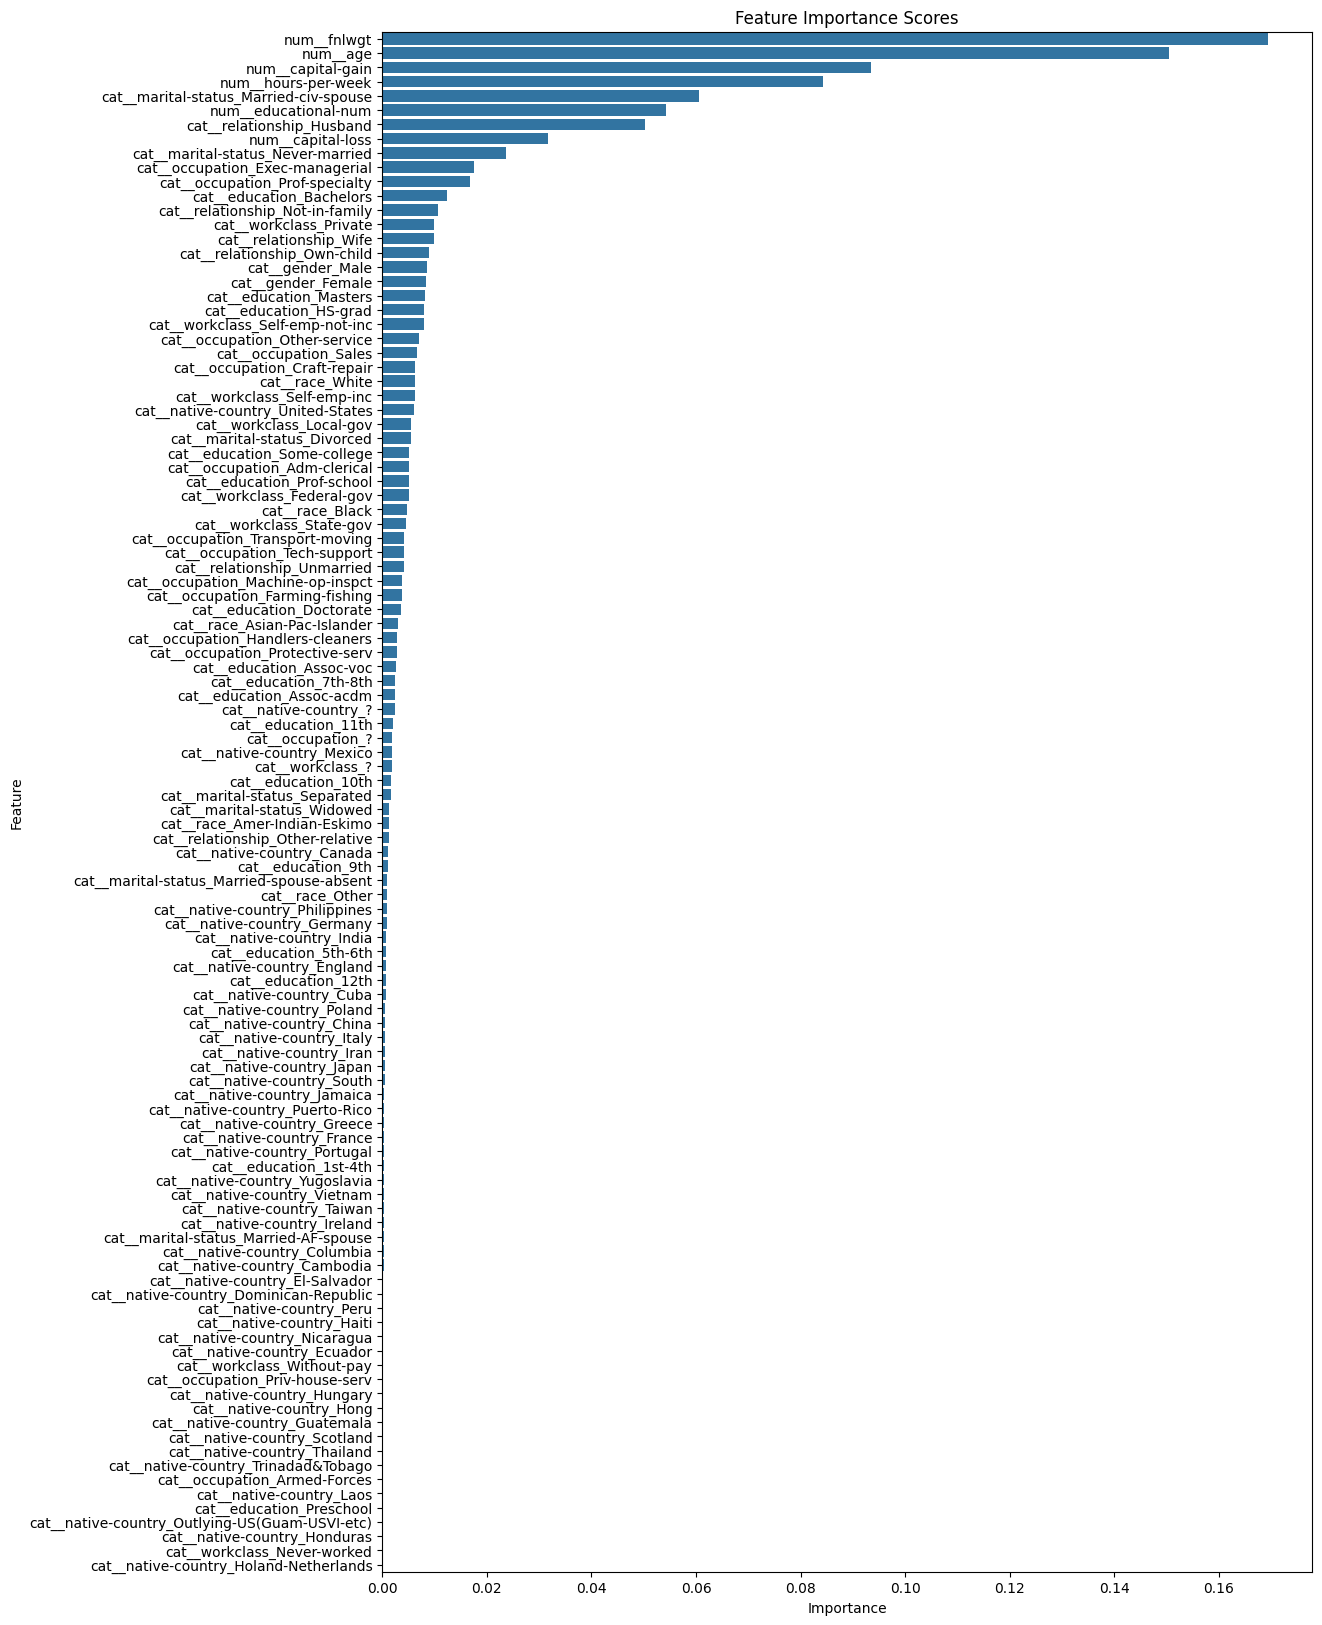

In [10]:
# Create a bar plot of feature importance
plt.figure(figsize=(12, 20))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Scores")
plt.show()


### Label Encoder

In [74]:
le = LabelEncoder()

X_train_le = X_train
X_test_le = X_test

# Apply LabelEncoder to the categorical columns
for col in categorical_cols:
    X_train_le[col] = le.fit_transform(X_train[col])
    X_test_le[col] = le.transform(X_test[col])

# Create a pipeline with preprocessing and the machine learning model
model = RandomForestClassifier(random_state=42)

# Fit the pipeline (including preprocessing) to the training data
model.fit(X_train_le, y_train)
# Make predictions on the test data
y_pred = model.predict(X_test_le)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Accuracy f1: {f1:.4f}")


Accuracy: 0.8640
Accuracy f1: 0.6890


### features importance

In [12]:
feature_importances = model.feature_importances_

# Combine the one-hot feature names with the numeric feature names
all_feature_names = X_train.columns  # categorical_cols + numeric_cols

# Create a DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame(
    {"Feature": all_feature_names, "Importance": feature_importances}
)

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)


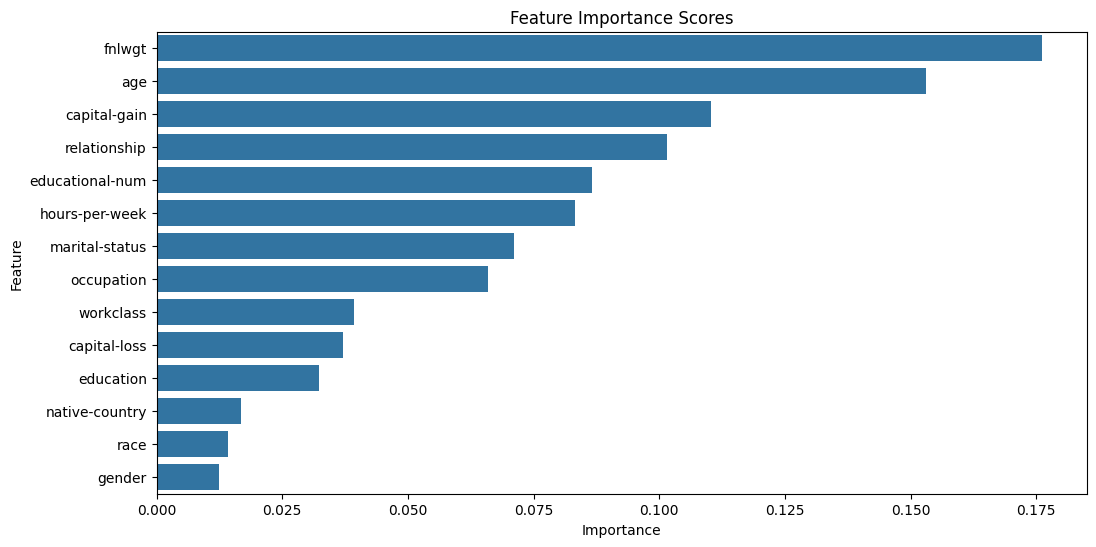

In [13]:
# Create a bar plot of feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Scores")
plt.show()


## XGBoost

### Label Encoder

In [52]:
le = LabelEncoder()

X_train_le = X_train.copy()
X_test_le = X_test.copy()

# Apply LabelEncoder to the categorical columns
for col in categorical_cols:
    X_train_le[col] = le.fit_transform(X_train[col])
    X_test_le[col] = le.transform(X_test[col])

# Create a pipeline with preprocessing and the machine learning model
model_xgb_le = XGBClassifier(random_state=42)

# Fit the pipeline (including preprocessing) to the training data
model_xgb_le.fit(X_train_le, y_train)
# Make predictions on the test data
y_pred = model_xgb_le.predict(X_test_le)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
f1_accuracy = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Accuracy f1: {f1_accuracy:.4f}")


Accuracy: 0.8759
Accuracy f1: 0.7189


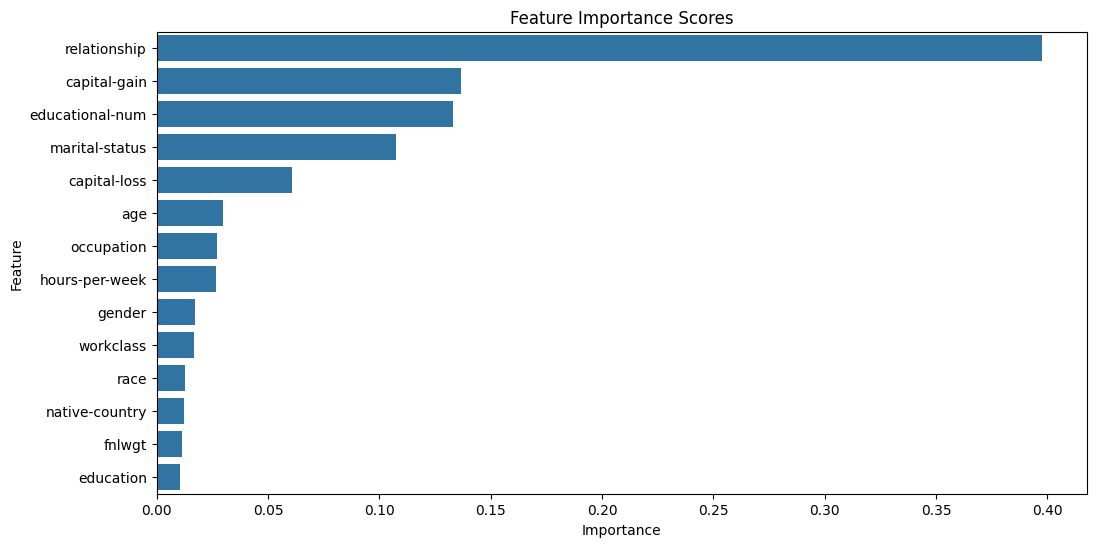

In [54]:
all_features = X_train_le.columns # preprocessor.get_feature_names_out()
# Get the feature importances using the model
feature_importances = model_xgb_le.feature_importances_

# Create a DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame(
    {"Feature": all_features, "Importance": feature_importances}
)

imp_plot = feature_importance_df.sort_values(by="Importance", ascending=False)

# Create a bar plot of feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=imp_plot)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Scores")
plt.show()

### OneHot Encoder + Scaler

In [77]:
# Define preprocessing for categorical and numeric data
categorical_preprocessor = OneHotEncoder(drop="if_binary", handle_unknown="ignore")
numeric_preprocessor = StandardScaler()

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_preprocessor, categorical_cols),
        ("num", numeric_preprocessor, numeric_cols),
    ],
    remainder="passthrough",  # You can use this to include any remaining columns
)

# Create a pipeline with preprocessing and the machine learning model
xgb_model = XGBClassifier(random_state=42)

xgb_pipeline = Pipeline([("preprocessor", preprocessor), ("model", xgb_model)])
# Fit the pipeline (including preprocessing) to the training data
xgb_pipeline.fit(X_train, y_train)
# Make predictions on the test data
xgb_predictions = xgb_pipeline.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
f1_accuracy = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Accuracy f1: {f1_accuracy:.4f}")


Accuracy: 0.8783
Accuracy f1: 0.7241


c:\Users\const\Anaconda\envs\inter-fair-env\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


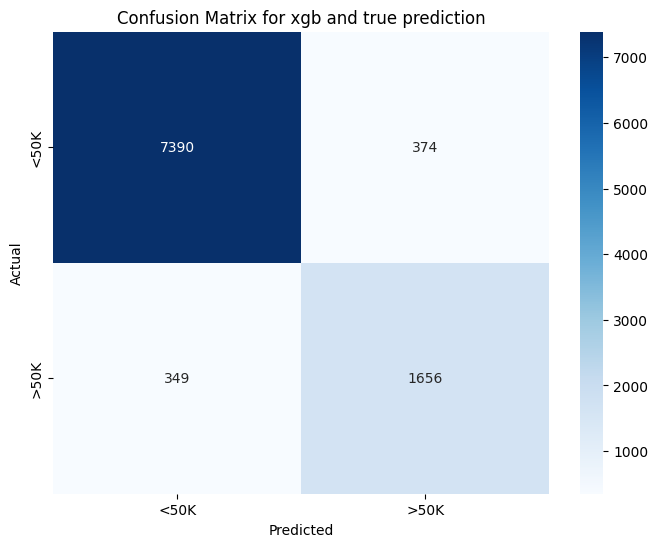

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(xgb_predictions, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["<50K", ">50K"], yticklabels=["<50K", ">50K"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for xgb and true prediction")
plt.show()

### features importance

In [35]:
all_features = preprocessor.get_feature_names_out()
# Get the feature importances using the model
feature_importances = pipeline["model"].feature_importances_

# Create a DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame(
    {"Feature": all_features, "Importance": feature_importances}
)


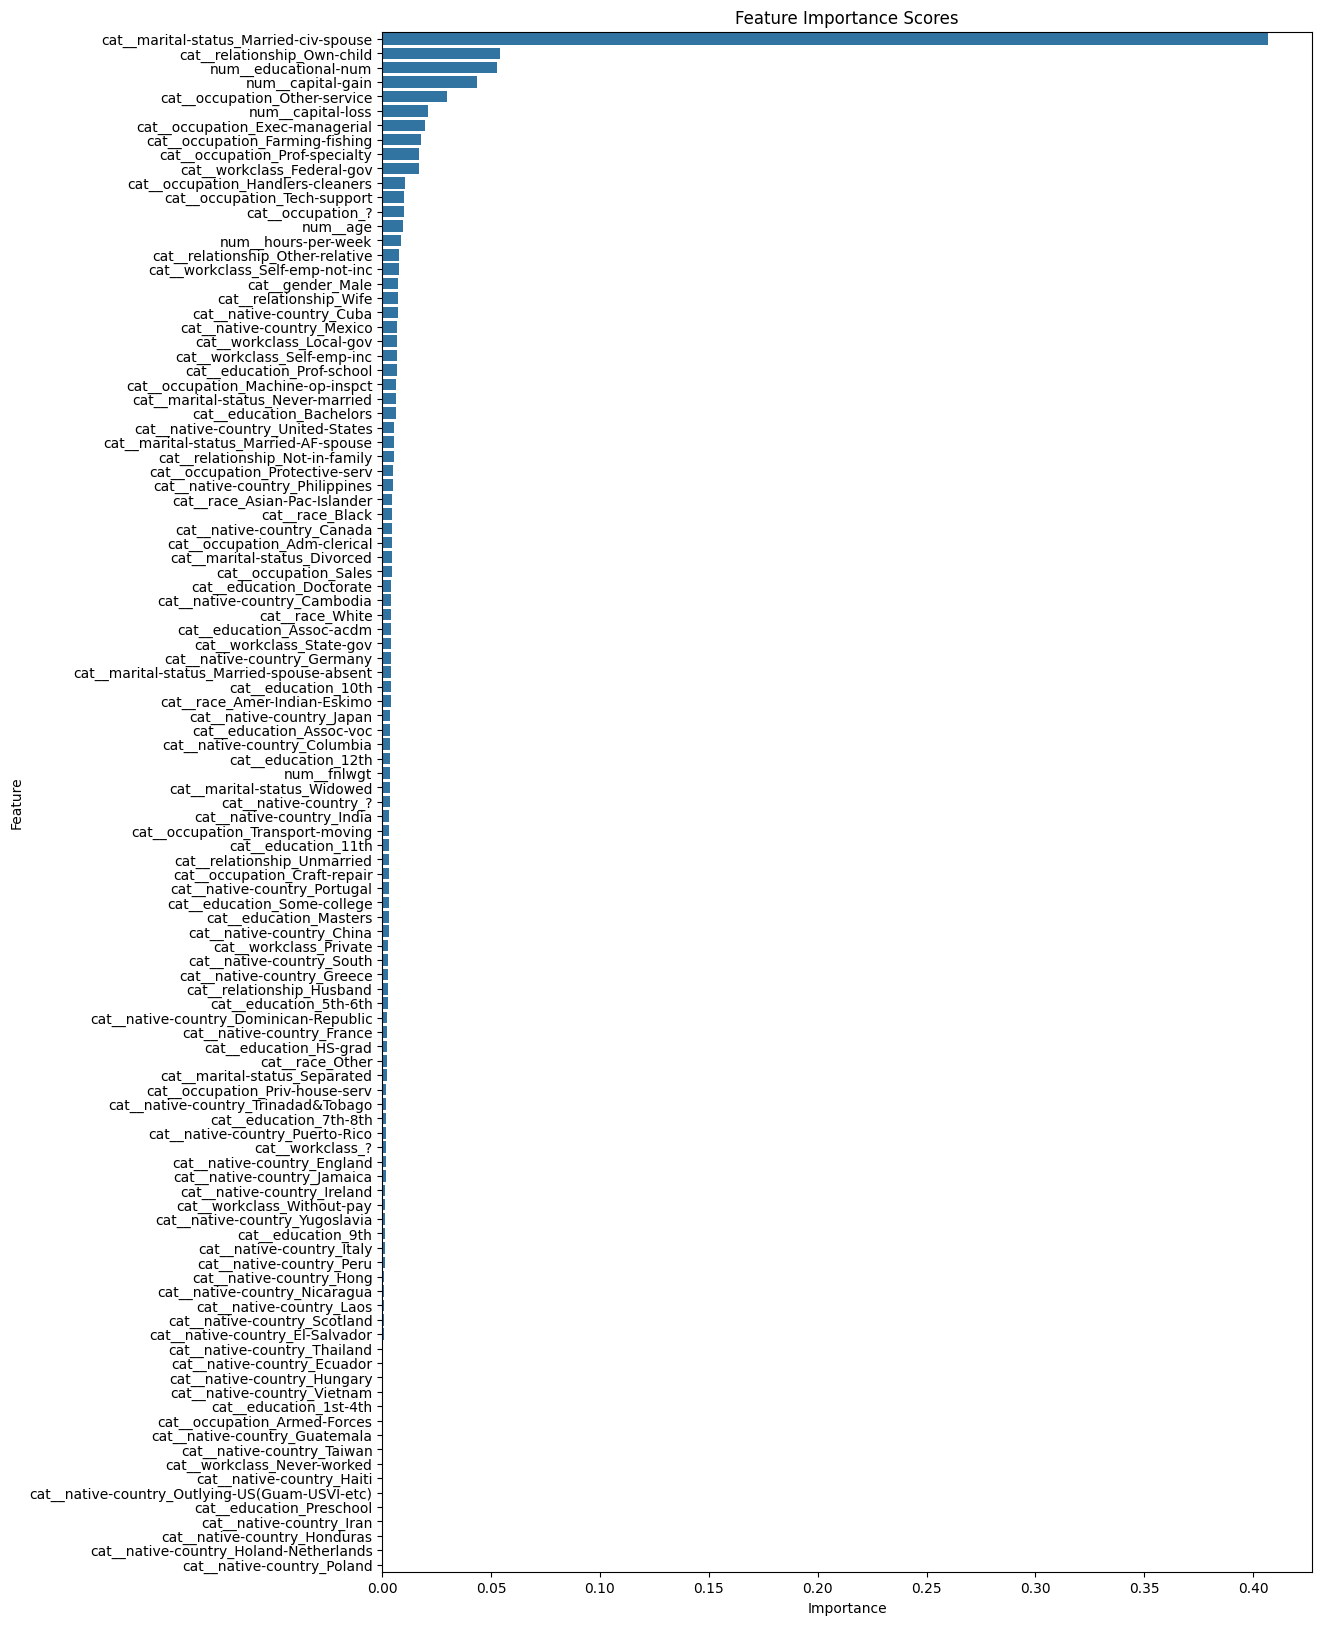

In [37]:
imp_plot = feature_importance_df.sort_values(by="Importance", ascending=False)

# Create a bar plot of feature importance
plt.figure(figsize=(12, 20))
sns.barplot(x="Importance", y="Feature", data=imp_plot)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Scores")
plt.show()


In [21]:
###################  HANDLE THE ONEHOT ENCODED FEATURES ######################

# Extract the original categorical feature names and category names
data_type = [
    col.split("__")[0] for col in feature_importance_df["Feature"]
]
original_categorical_features = [col.split("_")[2]
                  for col in feature_importance_df["Feature"]]
category_names = [col.split("_")[-1]
                  for col in feature_importance_df["Feature"]]

# Add the original feature and category names as columns in the DataFrame
feature_importance_df["DataType"] = data_type
feature_importance_df["OriginalFeature"] = original_categorical_features
feature_importance_df["Category"] = category_names

# Group by the original categorical feature and category, calculate the mean of importances
agg_feature_importance = pd.DataFrame(columns=["mean", "Importance_sum"])
agg_feature_importance["mean"] = feature_importance_df.groupby(["OriginalFeature"])["Importance"].mean()
agg_feature_importance["Importance_sum"] = feature_importance_df.groupby(["OriginalFeature"])["Importance"].sum()
agg_feature_importance = agg_feature_importance.reset_index()


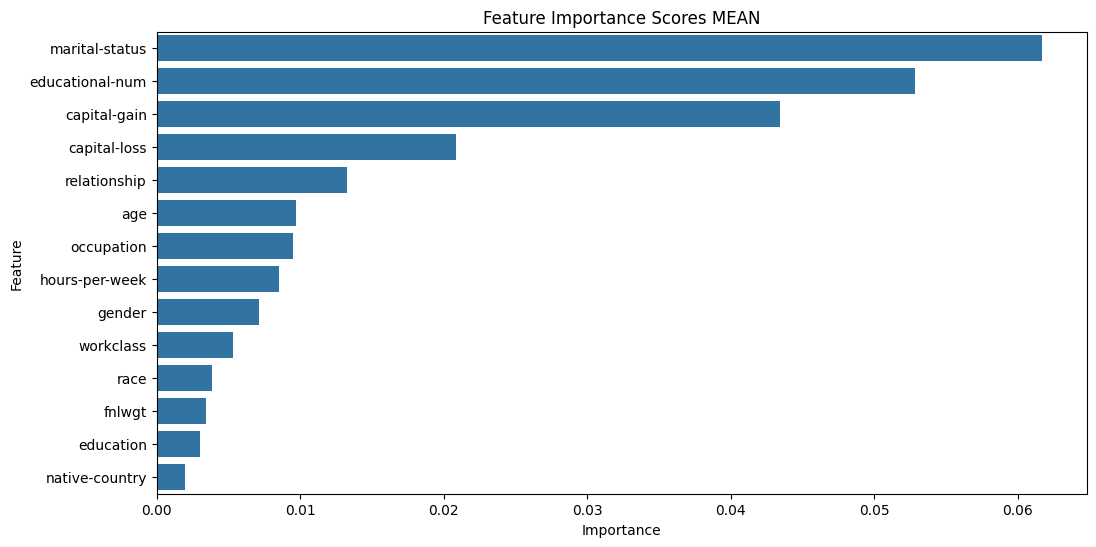

In [24]:
imp_plot = agg_feature_importance.sort_values(by="mean", ascending=False)

# Create a bar plot of feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x="mean", y="OriginalFeature", data=imp_plot)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Scores MEAN")
plt.show()


## LGBM

In [24]:
# Define preprocessing for categorical and numeric data
categorical_preprocessor = OneHotEncoder()
numeric_preprocessor = StandardScaler()

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_preprocessor, categorical_cols),
        ("num", numeric_preprocessor, numeric_cols),
    ],
    remainder="passthrough",  # You can use this to include any remaining columns
)

# Create a pipeline with preprocessing and the machine learning model
regressor = LGBMRegressor(
    max_depth=25, n_estimators=150, learning_rate=0.3, num_leaves=25
)

pipeline = Pipeline([("preprocessor", preprocessor), ("model", model)])
# Fit the pipeline (including preprocessing) to the training data
pipeline.fit(X_train, y_train)
# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
f1_accuracy = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Accuracy f1: {f1_accuracy:.4f}")


Accuracy: 0.8775
Accuracy f1: 0.7213


similar results than XGBoost but a little slower lets use XGBoost

## SURROGATE MODEL

## label encoder

#### LinearRegression

In [101]:
# Create a column transformer
preprocessor_le = ColumnTransformer(
    transformers=[
        ("num", numeric_preprocessor, numeric_cols)
    ],
    remainder="passthrough",  # You can use this to include any remaining columns
)

# Load your XGBoost model (replace with your model loading code)
xgb_model = xgb.XGBClassifier()

# Original pipeline for the XGBoost model
xgb_pipeline = Pipeline([("preprocessor", preprocessor), ("model", xgb_model)])

# Fit the original pipeline (including preprocessing) to the training data
xgb_pipeline.fit(X_train, y_train)

# Get predictions from the XGBoost model
xgb_predictions = xgb_pipeline.predict(X_test)

# Create a dataset for the surrogate model
surrogate_data = X_test.copy()
surrogate_data["XGB_Predictions"] = xgb_predictions

In [102]:
# Choose a surrogate model (linear regression)
surrogate_model = LinearRegression()

# Create a new pipeline for the surrogate model
surrogate_pipeline = Pipeline([("preprocessor", preprocessor), ("model", surrogate_model)])

# Train the surrogate model
surrogate_pipeline.fit(
    surrogate_data.drop("XGB_Predictions", axis=1), surrogate_data["XGB_Predictions"]
)

# Interpret the surrogate model (e.g., feature importance or coefficients)
surrogate_feature_importance = surrogate_model.coef_ # For linear regression

# Evaluate the surrogate model (optional)
surrogate_predictions = surrogate_pipeline.predict(X_test)
r2 = r2_score(xgb_predictions, surrogate_predictions)
print(f"R-squared for surrogate model: {r2}")

R-squared for surrogate model: 0.48777964714060384


#### SVGLinearSVC

In [103]:
from sklearn.svm import LinearSVC

# Choose a surrogate model (linear regression)
surrogate_model = LinearSVC(dual="auto", random_state=0, tol=1e-5)

# Create a new pipeline for the surrogate model
surrogate_pipeline = Pipeline([("preprocessor", preprocessor), ("model", surrogate_model)])

# Train the surrogate model
surrogate_pipeline.fit(
    surrogate_data.drop("XGB_Predictions", axis=1), surrogate_data["XGB_Predictions"]
)

surrogate_feature_importance = surrogate_model.coef_ # For linear regression

# Evaluate the surrogate model (optional)
surrogate_predictions = surrogate_pipeline.predict(X_test)
r2 = r2_score(xgb_predictions, surrogate_predictions)
print(f"R-squared for surrogate model: {r2}")

R-squared for surrogate model: 0.576383456678008


In [105]:
accuracy_score(xgb_predictions, surrogate_predictions)

0.9314086814086814

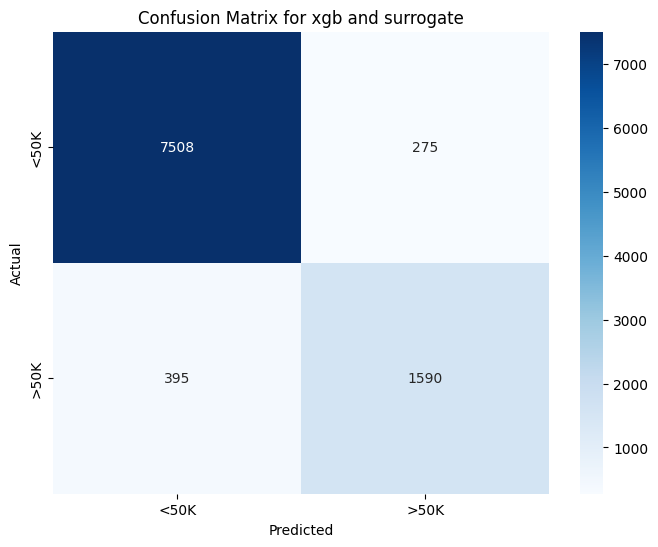

In [104]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(xgb_predictions, surrogate_predictions)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["<50K", ">50K"], yticklabels=["<50K", ">50K"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for xgb and surrogate")
plt.show()

#### Tree 

In [76]:
from sklearn.tree import DecisionTreeClassifier

surrogate_model = DecisionTreeClassifier()

# Create a new pipeline for the surrogate model
surrogate_pipeline = Pipeline([("preprocessor", preprocessor), ("model", surrogate_model)])

# Train the surrogate model
surrogate_pipeline.fit(
    surrogate_data.drop("XGB_Predictions", axis=1), surrogate_data["XGB_Predictions"]
)

# Evaluate the surrogate model (optional)
surrogate_predictions = surrogate_pipeline.predict(X_test)
r2 = r2_score(xgb_predictions, surrogate_predictions)
print(f"R-squared for surrogate model: {r2}")

R-squared for surrogate model: 1.0


In [82]:

# Fit a Decision Tree Classifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Tree Structure
# Get the depth of the tree
tree_depth = tree_model.get_depth()

# Get the number of nodes in the tree
num_nodes = tree_model.tree_.node_count

# Get the number of splits in the tree
num_splits = num_nodes - 1

# Feature Importance
# For Decision Trees based on Gini impurity
feature_importance_gini = tree_model.feature_importances_

# Print the results
print(f"Tree Depth: {tree_depth}")
print(f"Number of Nodes: {num_nodes}")
print(f"Number of Splits: {num_splits}")

print("Feature Importance (Decision Tree - Gini Impurity):")
for i, importance in enumerate(feature_importance_gini):
    print(f"Feature {i}: {importance}")


Tree Depth: 47
Number of Nodes: 11383
Number of Splits: 11382
Feature Importance (Decision Tree - Gini Impurity):
Feature 0: 0.11907791944945241
Feature 1: 0.03102227620824314
Feature 2: 0.20994858767754068
Feature 3: 0.01234533931473145
Feature 4: 0.11222519730812605
Feature 5: 0.007186714078148464
Feature 6: 0.05553398119833897
Feature 7: 0.19850489950468966
Feature 8: 0.01249435830309879
Feature 9: 0.0025728577930368315
Feature 10: 0.11372790114305585
Feature 11: 0.04068296096432842
Feature 12: 0.06908750172533892
Feature 13: 0.015589505331870276


In [99]:
all_features = preprocessor.get_feature_names_out()

# Create a DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame(
    {"Feature": all_features, "Importance": surrogate_feature_importance[0]}
)

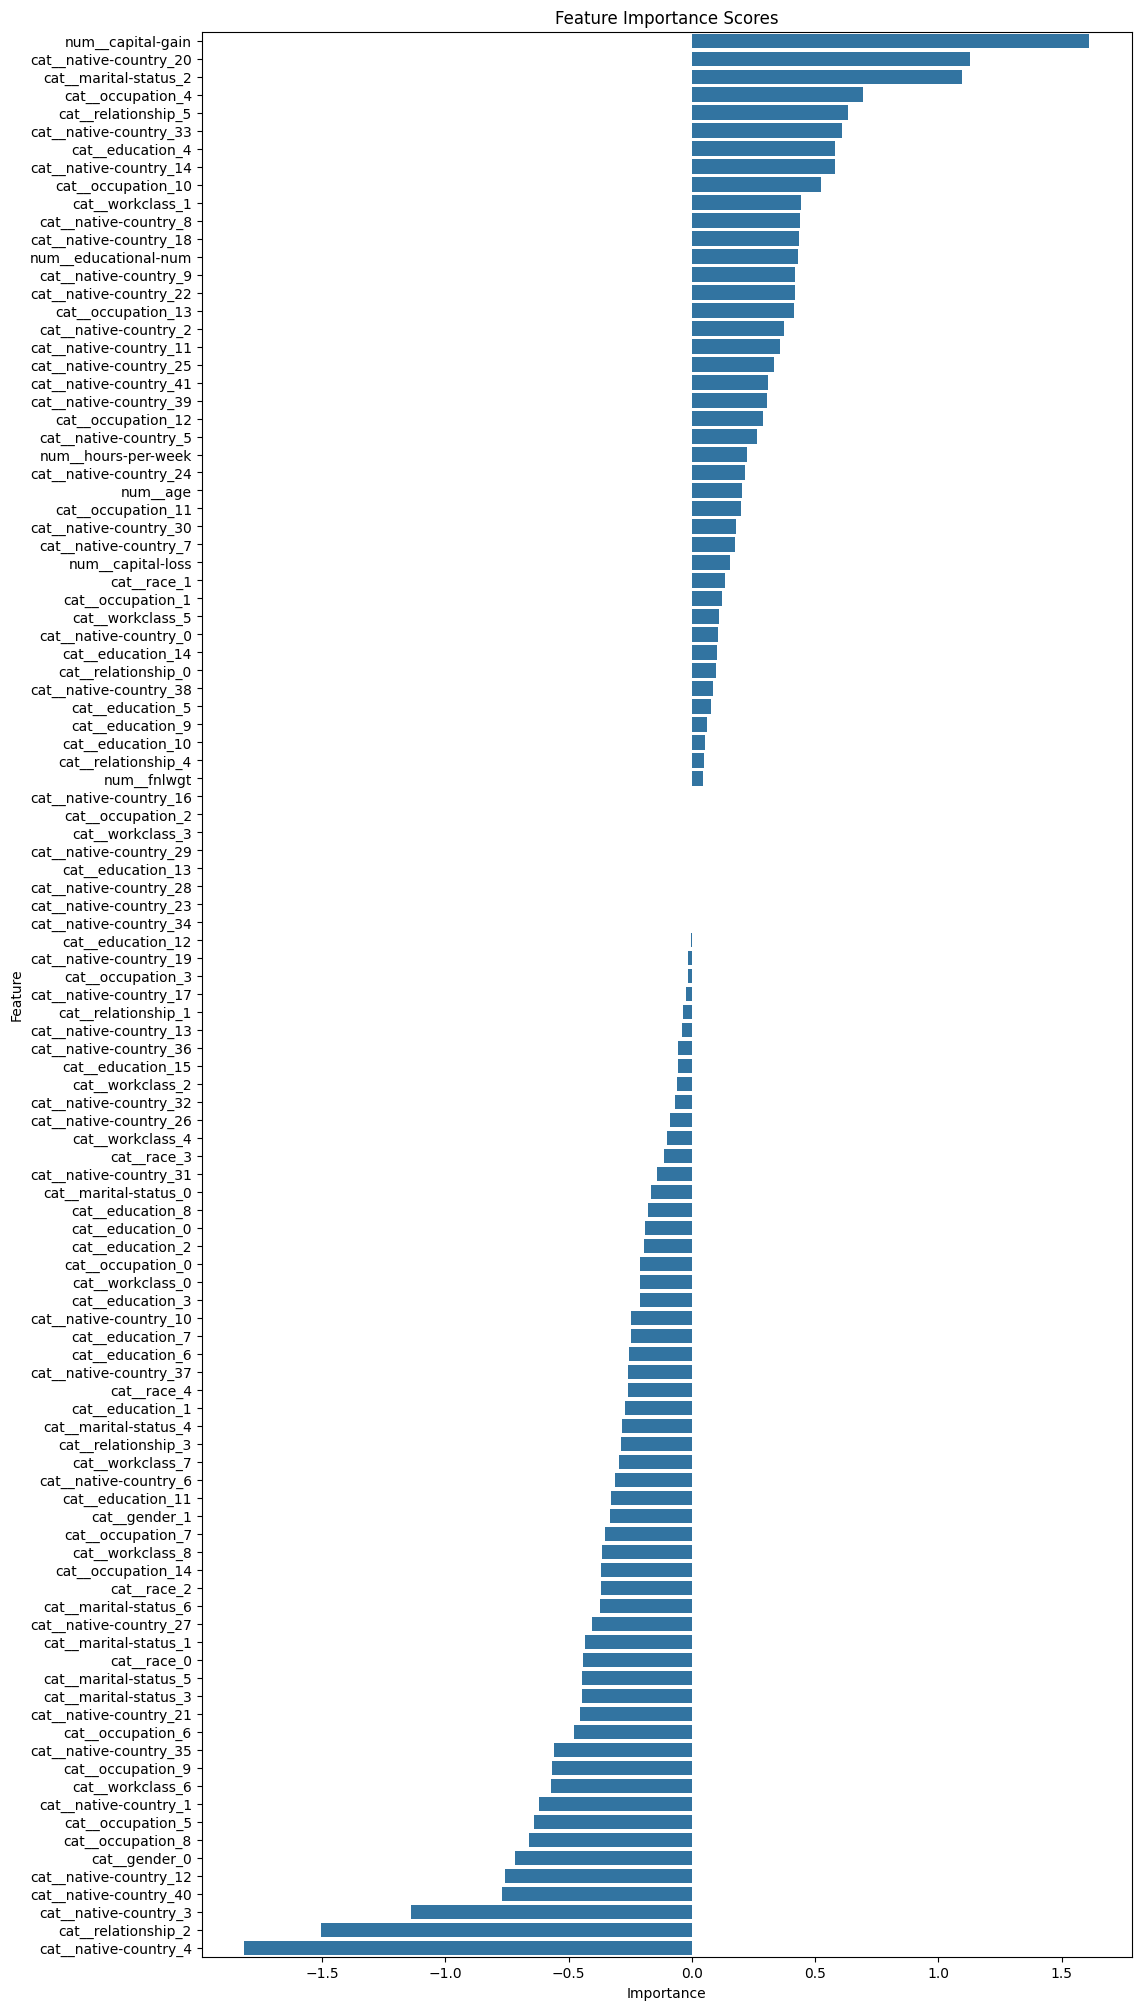

In [100]:
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Create a bar plot of feature importance
plt.figure(figsize=(12, 25))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Scores")
plt.show()


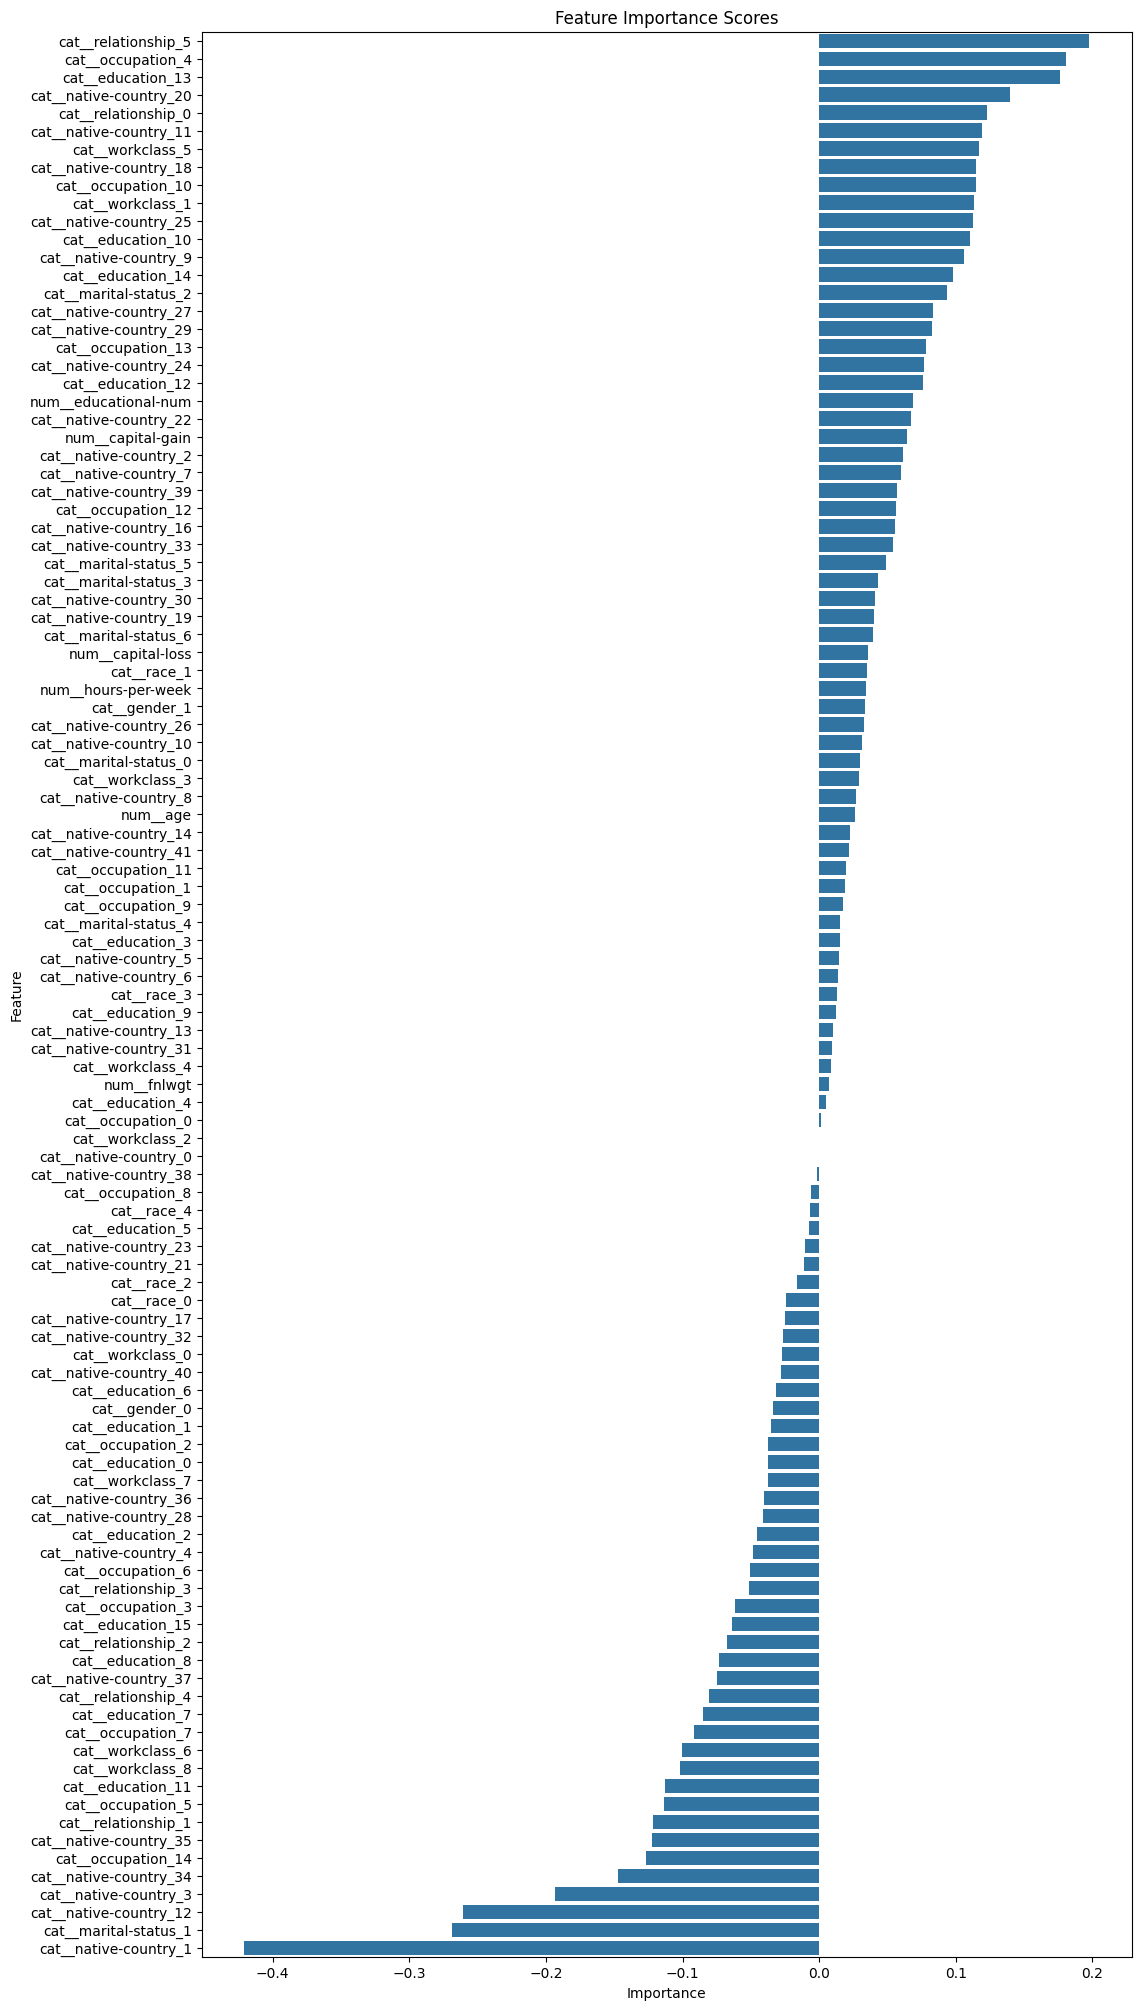

In [ ]:
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Create a bar plot of feature importance
plt.figure(figsize=(12, 25))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Scores")
plt.show()


## One Hot Encoding

In [32]:
categorical_preprocessor = OneHotEncoder()

# Create a column transformer
preprocessor_xgb = ColumnTransformer(
    transformers=[
        ("cat", categorical_preprocessor, categorical_cols),
        ("num", numeric_preprocessor, numeric_cols)
    ],
    remainder="passthrough",  # You can use this to include any remaining columns
)

# Original pipeline for the XGBoost model
xgb_pipeline = Pipeline([("preprocessor", preprocessor_xgb), ("model", xgb_model)])

# Fit the original pipeline (including preprocessing) to the training data
xgb_pipeline.fit(X_train, y_train_bin)

# Get predictions from the XGBoost model
xgb_predictions = xgb_pipeline.predict(X_test)

# Create a dataset for the surrogate model
surrogate_data = X_test.copy()
surrogate_data["XGB_Predictions"] = xgb_predictions

# Choose a surrogate model (linear regression)
surrogate_model = LinearRegression()

# Create a new pipeline for the surrogate model
surrogate_pipeline = Pipeline([("preprocessor", preprocessor_xgb), ("model", surrogate_model)])

# Train the surrogate model
surrogate_pipeline.fit(
    surrogate_data.drop("XGB_Predictions", axis=1), surrogate_data["XGB_Predictions"]
)

# Interpret the surrogate model (e.g., feature importance or coefficients)
surrogate_feature_importance = surrogate_model.coef_ # For linear regression

# Evaluate the surrogate model (optional)
surrogate_predictions = surrogate_pipeline.predict(X_test)
r2 = r2_score(xgb_predictions, surrogate_predictions)
print(f"R-squared for surrogate model: {r2}")

R-squared for surrogate model: 0.5121294887195479


In [33]:
all_features = preprocessor_xgb.get_feature_names_out()

# Create a DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame(
    {"Feature": all_features, "Importance": surrogate_feature_importance}
)

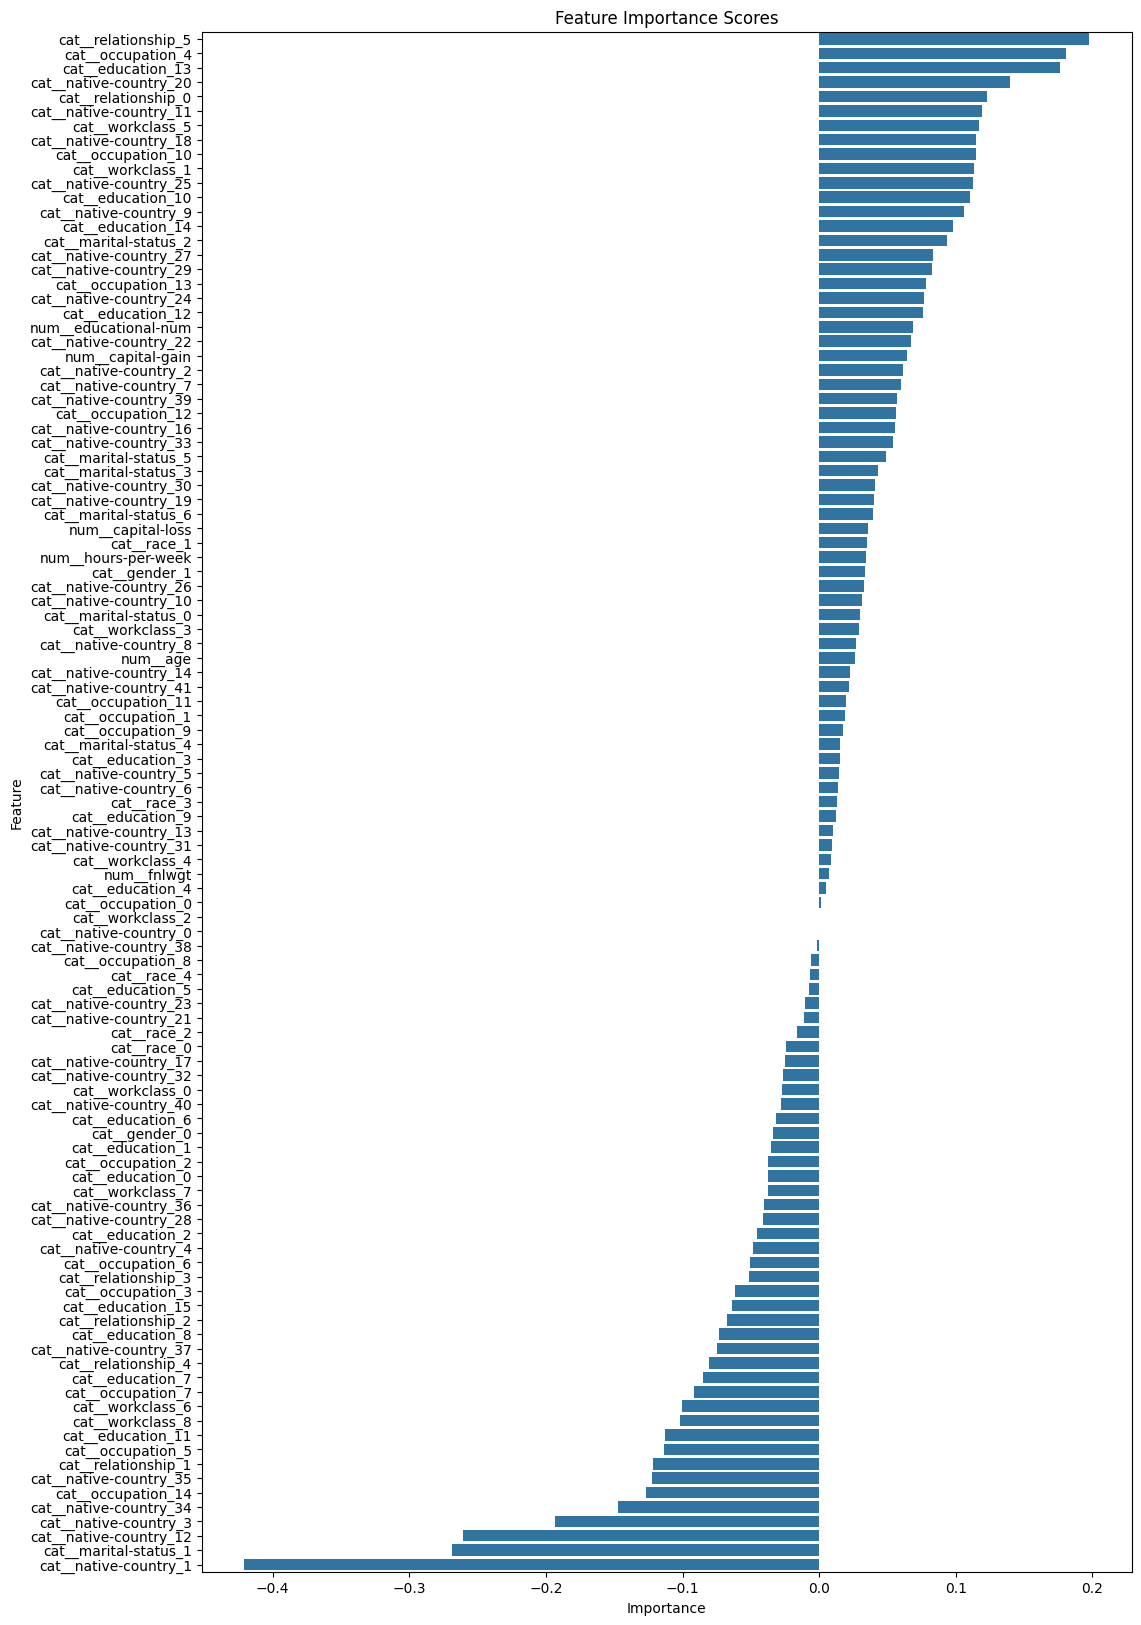

In [34]:
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Create a bar plot of feature importance
plt.figure(figsize=(12, 20))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Scores")
plt.show()


In [35]:
feature_importance_df['data_type'] = [feat.split("_")[0] for feat in feature_importance_df["Feature"]]
feature_importance_df['OriginalFeature'] = [feat.split("_")[2] for feat in feature_importance_df["Feature"]]
feature_importance_df['category'] = [feat.split("_")[-1] for feat in feature_importance_df["Feature"]]

In [36]:
feature_importance_df.to_csv("linear_surrogate_xgb.csv")

## Perf and interpret 

In [59]:
X = data_df.drop(['income'], axis=1)
y = data_df['income']
y = y.replace({">50K": 1, "<=50K": 0})


In [79]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

# Create a cross-validation splitter (Stratified K-Fold is a good choice for classification)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store ROC curve data
all_fpr = []
all_tpr = []
all_auc = []

# Perform cross-validation
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the XGBoost model to the training data
    xgb_pipeline.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_scores = xgb_pipeline.predict_proba(X_test)[:, 1]  # Probability of the positive class
    
    # Compute the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    all_fpr.append(fpr)
    all_tpr.append(tpr)
    
    # Compute the AUC
    roc_auc = auc(fpr, tpr)
    all_auc.append(roc_auc)

# Calculate the mean ROC curve and AUC
mean_fpr = np.mean(all_fpr)
mean_tpr = np.mean(all_tpr)
mean_auc = np.mean(all_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_tpr, color='b', label='Mean ROC (AUC = {:.2f})'.format(mean_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


c:\Users\const\Anaconda\envs\inter-fair-env\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.

In [80]:
y_pred_cv = cross_val_predict(xgb_pipeline, X, y, cv=7)


c:\Users\const\Anaconda\envs\inter-fair-env\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [95]:
from sklearn.metrics import roc_auc_score

# Perform cross-validated predictions
y_pred = cross_val_predict(xgb_pipeline, X, y, cv=5, method='predict')
accuracy_score(y_pred,y)
roc_auc_score(y_pred,y)
f1_score(y_pred,y)

c:\Users\const\Anaconda\envs\inter-fair-env\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
